# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as stats
import pylab as plt

from functools import reduce
from scipy import stats as st
from collections import Counter

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv('./Temp_States.csv')
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [3]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


In [4]:
# Tenemos 2 variables de tipo objeto (strings) y la temperatura es tipo float

#### Select the rows where state is New York

In [6]:
temp_ny = temp[temp.State == 'New York']
temp_ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [7]:
temp_ny.Temperature.mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celsius

In [8]:
temp_above = temp[temp.Temperature > 15]
temp_above

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [10]:
temp_above.City

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [16]:
temp_above = temp[(temp.Temperature > 15) & (temp.Temperature < 20)]
temp_above

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [20]:
pd.pivot_table(temp, values='Temperature', index='State', aggfunc={'Temperature':['mean', 'std']})

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [2]:
employee = pd.read_csv('./Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [3]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


In [4]:
# Tenemos 4 columnas de tipo objeto y 2 de tipo int - Años en la empresa y salario

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

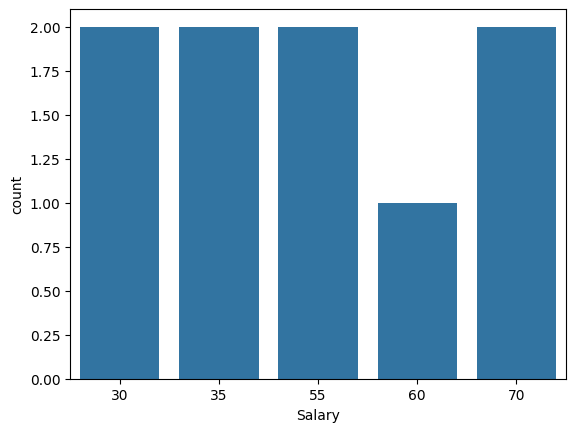

In [5]:
# Vamos a mostrar un histograma de los salarios
sns.countplot(x=employee.Salary);

In [6]:
# De este histograma se puede ver que en cada rango salarial hay dos personas, salvo para 60k que resulta ser del único associate con PHD.

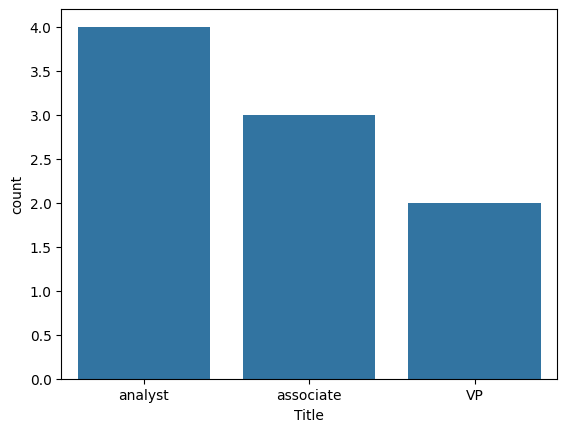

In [7]:
sns.countplot(x=employee.Title);

In [8]:
# De este gráfico se saca una conclusión natural que muestra la escala piramidal de muchas empresas, cuanto más alta la posicion menos gente hay en el equipo

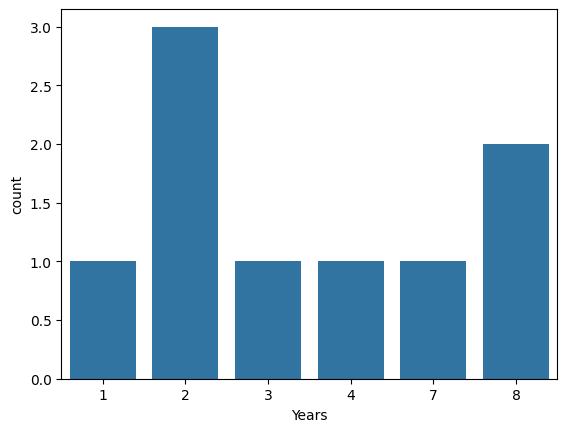

In [9]:
sns.countplot(x=employee.Years);

In [10]:
# No nos dice mucho este grafo, sería mas interesante verlo agrupado por posición + años en la empresa para ver la distribución

#### What's the average salary in this company?

In [11]:
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [12]:
employee.Salary.max()

70

#### What's the lowest salary?

In [13]:
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [14]:
lowest = employee.Name[employee.Salary == employee.Salary.min()]
lowest

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [15]:
David = employee[employee.Name == 'David']
David

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [16]:
David_sal = David.Salary
David_sal

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [17]:
employee[employee.Title == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [18]:
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [19]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [20]:
# Estoy inspirado, te doy una 3a
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [21]:
employee[(employee.Title == 'associate') & (employee.Salary > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [22]:
pd.pivot_table(employee, values=['Salary'],index='Years', aggfunc='mean')

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [23]:
pd.pivot_table(employee, values=['Salary'],index='Title', aggfunc='mean')

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

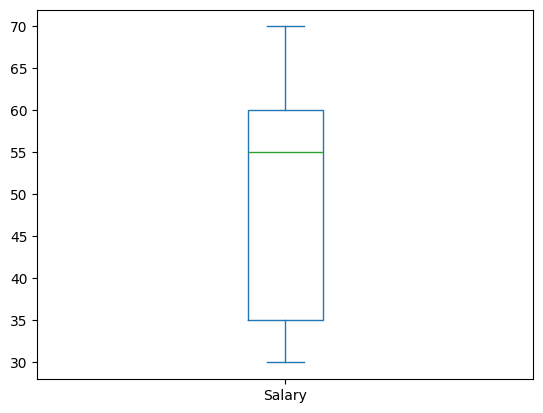

In [25]:
employee.Salary.plot.box();

In [28]:
stats = employee.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0
Salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0


In [29]:
stats['25%']

Years      2.0
Salary    35.0
Name: 25%, dtype: float64

In [30]:
stats['75%']

Years      7.0
Salary    60.0
Name: 75%, dtype: float64

#### Is the mean salary per gender different?

In [31]:
pd.pivot_table(employee, values=['Salary'],index='Gender', aggfunc='mean')

,Salary
Gender,
F,47.5
M,50.0


In [32]:
# Es mayor el salario medio de los hombres por encima de las mujeres

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [34]:
stats

,count,mean,std,min,25%,50%,75%,max
Years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0
Salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [35]:
# LUEGO LO HAGO

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [37]:
orders = pd.read_csv('./Orders.zip')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [38]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [41]:
# Tenemos un popurrí de tipos de dato, desde objetos a enteros a flotantes. Ninguno de los tipos nos extraña.

In [40]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


In [42]:
# Ningún valor parece demasiado alejado de la realidad. La cantidad máxima gastada es de $169000 pero siendo el precio unitario máximo $8150 puede ser real.

####  What is the average Purchase Price?

In [43]:
# $22.39 average purchase price

#### What were the highest and lowest purchase prices? 

In [44]:
# max = $168469.60
# min = $0.0 -> no tiene mucho sentido que haya un invoice para una compra de 0$

#### Select all the customers we have in Spain

In [49]:
Esp = orders.CustomerID[orders.Country == 'Spain'].unique()
Esp

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442], dtype=int64)

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [51]:
len(Esp)

30

#### Select all the customers who have bought more than 50 items ?

In [78]:
compras_per_cust = pd.pivot_table(orders, values='StockCode', index='CustomerID', aggfunc='nunique') # Creo un pivot table contando los stockcode y agrupando por customer
compras_per_cust

,StockCode
CustomerID,
12346,1
12347,103
12348,22
12349,73
12350,17
...,...
18280,10
18281,7
18282,12


In [79]:
compras_per_cust_cinc = compras_per_cust[compras_per_cust.StockCode >= 50] # Filtro los que hayan comprado más de 50
compras_per_cust_cinc.head()

,StockCode
CustomerID,
12347,103
12349,73
12352,59
12354,58
12356,53


In [81]:
compras_per_cust_cinc.shape # Hay 1705 customers que han comprado más de 50

(1705, 1)

#### Select orders from Spain that are above 50 items

In [82]:
compras_per_cust_cinc.columns

Index(['StockCode'], dtype='object')

In [85]:
compras_per_cust_esp = pd.pivot_table(orders, values='StockCode', index=['CustomerID','Country'], aggfunc='nunique')
compras_per_cust_esp.head()

,,StockCode
CustomerID,Country,
12346,United Kingdom,1
12347,Iceland,103
12348,Finland,22
12349,Italy,73
12350,Norway,17


In [86]:
compras_per_cust_esp.shape

(4347, 1)

In [89]:
compras_per_cust_esp.columns

Index(['StockCode'], dtype='object')

In [92]:
# Vale tenemos el mismo tamaño que antes, ahora vamos a filtrar por país: ojo porque este no es una columna
compras_per_cust_esp_spain = compras_per_cust_esp[compras_per_cust_esp.index.get_level_values('Country') == 'Spain']
compras_per_cust_esp_spain

'''
El index.get_level_values devuelve el indice de los valores que le pides -> Vale dentro del filtro del df porque
es compatible con enteros y strings
'''

'\nEl index.get_level_values devuelve el indice de los valores que le pides -> Vale dentro del filtro del df porque\nes compatible con enteros y strings\n'

#### Select all free orders

In [93]:
orders[orders.UnitPrice == 0]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [96]:
objetivo = 'lunch bag'
comida = orders[orders.Description.str.contains(objetivo)]
comida.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


In [98]:
comida.shape

(11556, 14)

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [100]:
comida_2011 = orders[(orders.Description.str.contains(objetivo)) & (orders.year == 2011)]
comida_2011.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


In [101]:
comida_2011.shape

(11234, 14)

#### Show the frequency distribution of the amount spent in Spain.

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here